#DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

#Objective: 
Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

###Domain: Finance

#Analysis to be done:
 Perform data preprocessing and build a deep learning prediction model.

#Steps to be done: 

-    Load the dataset that is given to you
-    Check for null values in the dataset
-   Print percentage of default to payer of the dataset for the TARGET column
-   Balance the dataset if the data is imbalanced
-    Plot the balanced data or imbalanced data
-    Encode the columns that is required for the model
-  Calculate Sensitivity as a metrice
-    Calculate area under receiver operating characteristics curve

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling   import SMOTE
from imblearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import roc_auc_score, roc_curve, auc


import warnings
warnings.filterwarnings('ignore')


# LOADING THE DATA :

In [2]:
!gdown '1kFIgyy4MdK0DT3VO_qrWrBple2suXHte'

Downloading...
From: https://drive.google.com/uc?id=1kFIgyy4MdK0DT3VO_qrWrBple2suXHte
To: /content/loan_data (1).csv
100% 166M/166M [00:02<00:00, 77.1MB/s]


In [3]:
data = pd.read_csv('/content/loan_data (1).csv')
data.shape

(307511, 122)

In [4]:
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.describe(include=['object'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [7]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# DATA PRE-PROCESSING :

In [8]:
#checking for duplicated values
data.duplicated().sum()

0

In [9]:
#checking for null values
null_features = data.isnull().sum()

# Filter the features that contain null values
null_features = null_features[null_features > 0]

print("Number of features with null features =", len(null_features))
print("Total percentage of features with null values = ",np.round((len(null_features)/len(data.columns))*100))
print("#"*60)
#percentage of null values in each column
print(((null_features/len(data))*100).sort_values().to_string())

Number of features with null features = 67
Total percentage of features with null values =  55.0
############################################################
DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
EXT_SOURCE_2                     0.214626
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
EXT_SOURCE_3                    19.825307
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YE

In [12]:
#droping those features which have more than 40% of null values

# Set a threshold for null values (e.g., 50%)
threshold = 0.4  
columns_with_null = data.columns[(data.isnull().sum()/len(data)) > threshold]
print("Number of columns with more than 40% null values =", len(columns_with_null))
# Drop the columns with more null values
new_df = data.drop(columns_with_null, axis=1)
print()
print("After removing null columns the total number of features =",len(new_df.columns))

Number of columns with more than 40% null values = 49

After removing null columns the total number of features = 73


## TARGET COLUMN :

In [13]:
#number of unique components in target
print("Total number of unique values in TARGET =",new_df['TARGET'].nunique())

Total number of unique values in TARGET = 2


In [14]:
#percentage of target columns
(new_df['TARGET'].value_counts()/len(new_df['TARGET']))*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

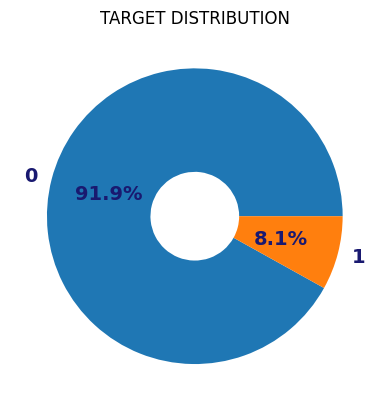

In [15]:
plt.figure()
new_df['TARGET'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.7), autopct='%1.1f%%',
                                 textprops= dict(color = 'midnightblue',size=14,weight='bold'))
plt.title('TARGET DISTRIBUTION')
plt.ylabel(None)
plt.show()

## OTHER FEATURES : 

1. NAME_CONTRACT_TYPE :

In [16]:
new_df['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

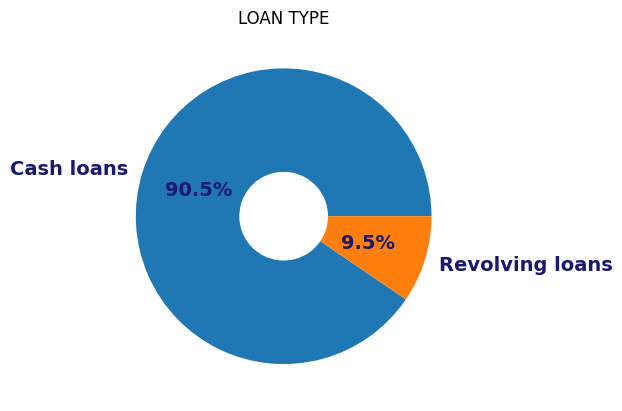

In [17]:
plt.figure()
new_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.7), autopct='%1.1f%%',
                                 textprops= dict(color = 'midnightblue',size=14,weight='bold'))
plt.title('LOAN TYPE')
plt.ylabel(None)
plt.show()



> 2. OCCUPATION_TYPE



In [18]:
new_df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [19]:
#replacing "nan" to "others"
new_df['OCCUPATION_TYPE'] = new_df['OCCUPATION_TYPE'].replace(np.nan,'Others')

Text(0.5, 1.0, 'TYPES OF OCCUPATION')

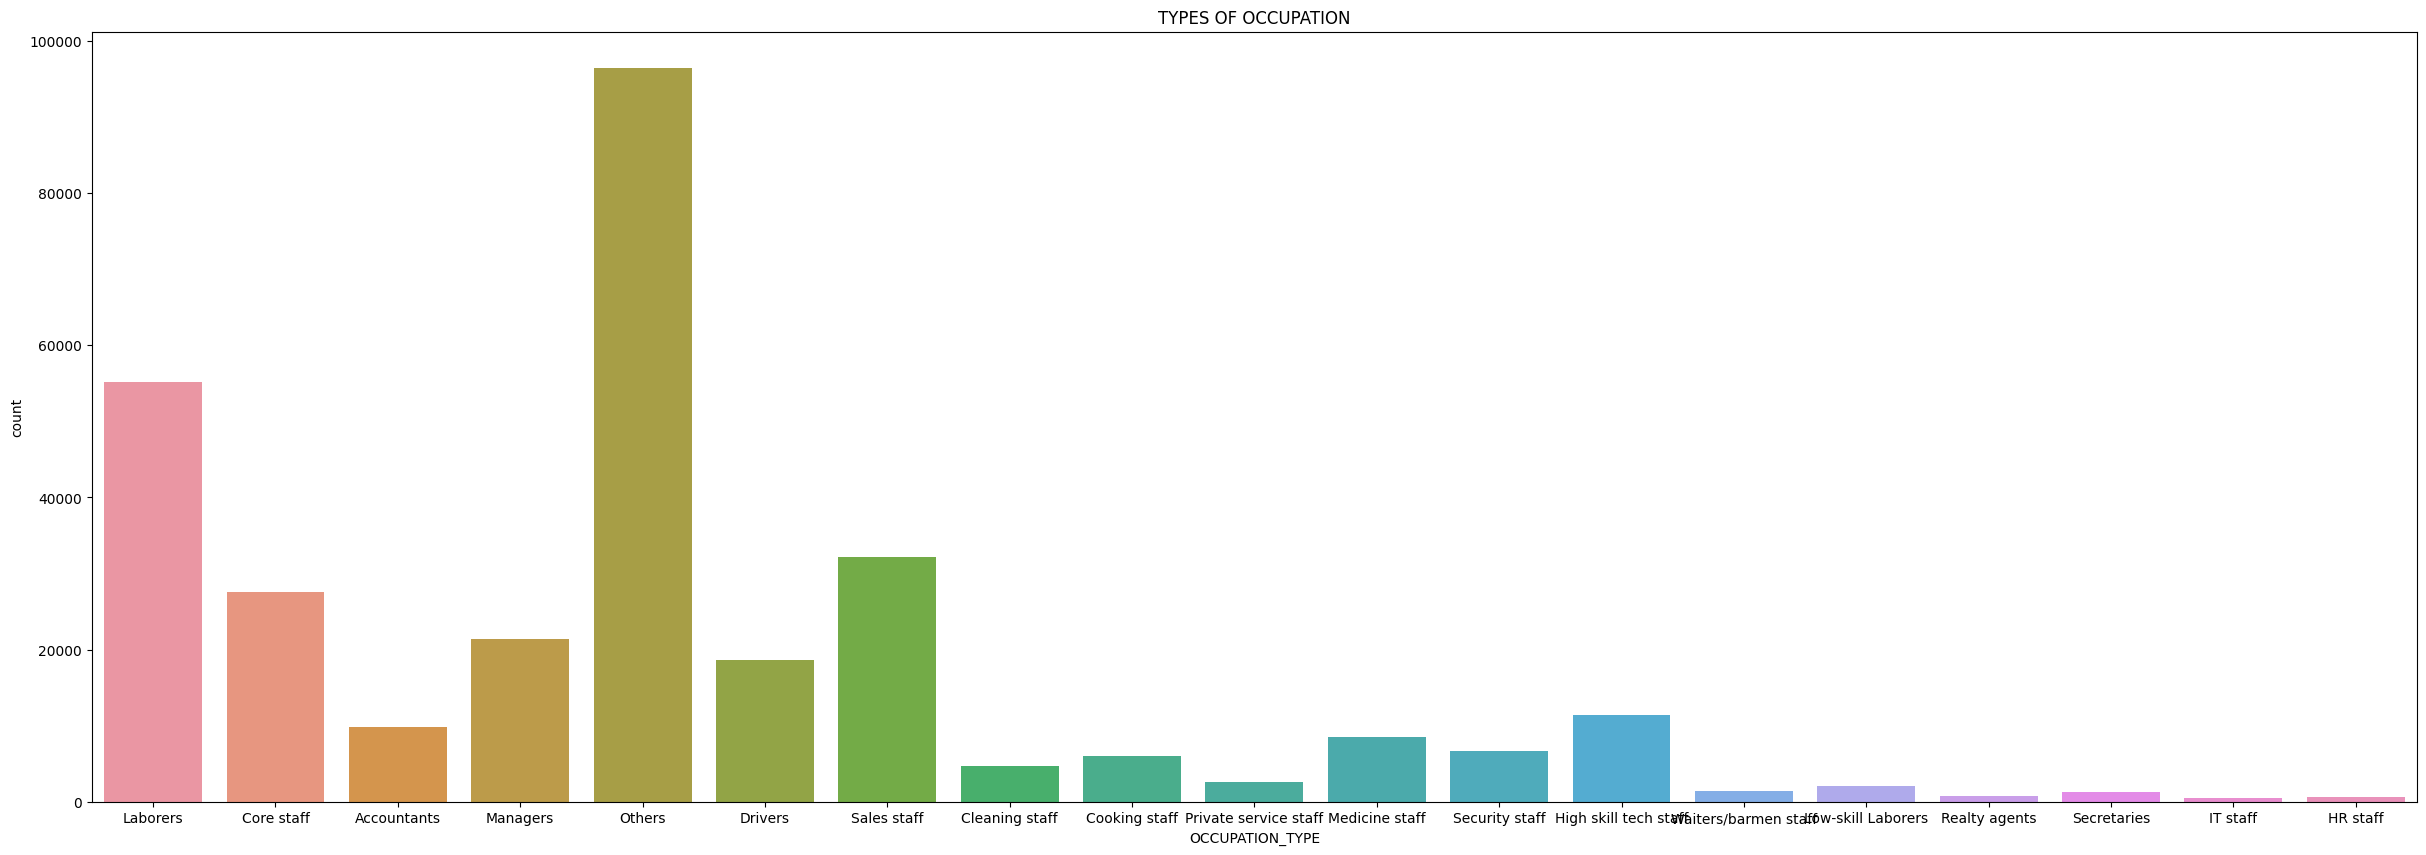

In [20]:
plt.figure(figsize=(30,10))
sns.countplot(data=new_df ,x='OCCUPATION_TYPE')
plt.title("TYPES OF OCCUPATION")

3. CODE_GENDER

In [21]:
new_df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [22]:
#droping the rows which contain 'XNA'
new_df = new_df.loc[new_df['CODE_GENDER'] != 'XNA']

In [23]:
new_df.shape

(307507, 73)

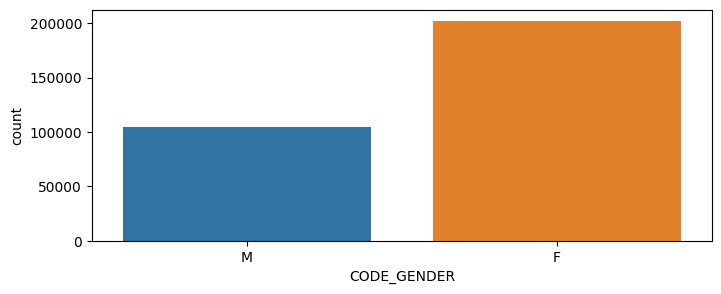

In [24]:
plt.figure(figsize=(8,3))
sns.countplot(data=new_df, x='CODE_GENDER')
plt.show()

4. NAME_FAMILY_STATUS

In [25]:
new_df['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [26]:
#droping rows which contain "unknown"
new_df = new_df.loc[new_df['NAME_FAMILY_STATUS'] != 'Unknown']

In [27]:
new_df.shape

(307505, 73)

Text(0.5, 1.0, 'MARITAL STATUS')

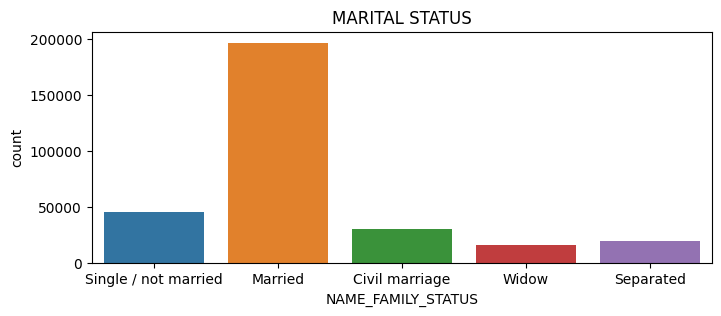

In [28]:
plt.figure(figsize=(8,3))
sns.countplot(data=new_df, x='NAME_FAMILY_STATUS')
plt.title("MARITAL STATUS")

> NAME_TYPE_SUITE

In [29]:
new_df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [30]:
new_df['NAME_TYPE_SUITE'] = new_df['NAME_TYPE_SUITE'].replace(np.nan,'Unaccompanied')
new_df['NAME_TYPE_SUITE'] = new_df['NAME_TYPE_SUITE'].replace('Other_A','Others')
new_df['NAME_TYPE_SUITE'] = new_df['NAME_TYPE_SUITE'].replace('Other_B','Others')
new_df['NAME_TYPE_SUITE'] = new_df['NAME_TYPE_SUITE'].replace('Group of people','Others')

Text(0.5, 1.0, 'ANY PARTNER ?')

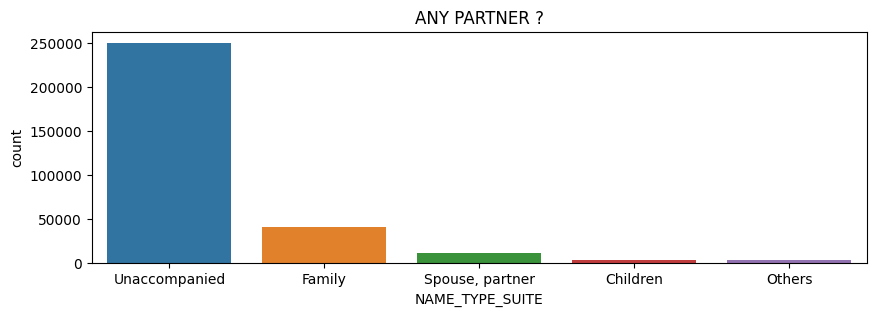

In [31]:
plt.figure(figsize=(10,3))
sns.countplot(data=new_df,x='NAME_TYPE_SUITE')
plt.title("ANY PARTNER ?")



> ORGANIZATION_TYPE
 



In [32]:
new_df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [33]:
new_df['ORGANIZATION_TYPE'].describe(include = 'Object')

count                     307505
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [34]:
new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].replace('XNA','Others')

new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].replace(['Trade: type 7','Trade: type 2'
'Trade: type 3','Trade: type 6','Trade: type 1','Trade: type 5','Trade: type 4'],'Trading')

new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].replace(['Industry: type 11',
'Industry: type 1','Industry: type 4','Industry: type 7','Industry: type 3','Industry: type 9',
'Industry: type 2','Industry: type 12','Industry: type 10','Industry: type 4','Industry: type 13',
'Industry: type 8','Industry: type 6'],'Industry')

new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].replace(['Transport: type 4',
'Transport: type 3','Transport: type 2','Transport: type 1'],'Transport')

new_df['ORGANIZATION_TYPE'] = new_df['ORGANIZATION_TYPE'].replace(['Business Entity Type 3',
'Business Entity Type 2','Business Entity Type 1'],'Business Entity')



In [35]:
new_df['ORGANIZATION_TYPE'].nunique()

38

## CHECKING FOR CORREALTED

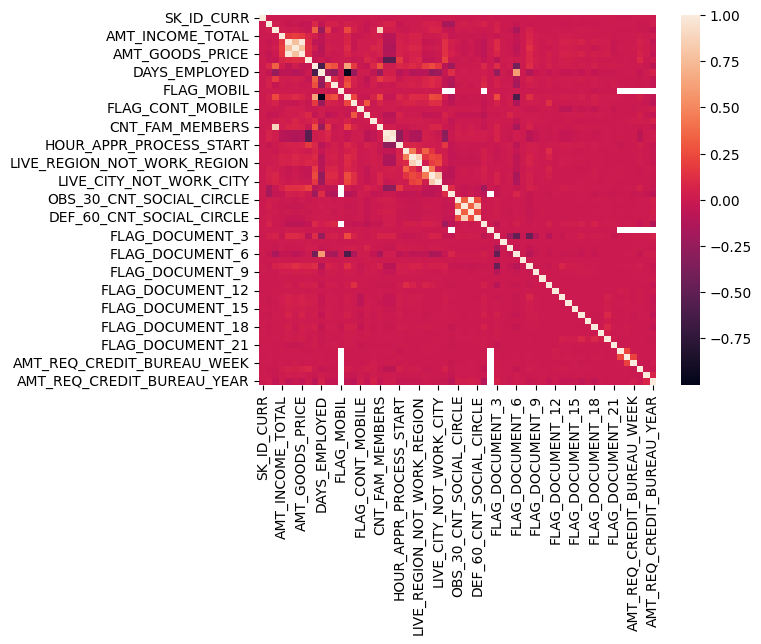

In [36]:
corr = new_df.corr()
sns.heatmap(corr, annot=False )
plt.show()

In [37]:
corr_matrix = new_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col]>0.90)]
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [38]:
new_df = new_df.drop(new_df[to_drop], axis=1)
new_df = new_df.drop('SK_ID_CURR', axis=1)

In [39]:
new_df.shape

(307505, 68)

In [40]:
new_df =new_df.drop(['FLAG_DOCUMENT_2','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_WORK_PHONE'], axis=1)

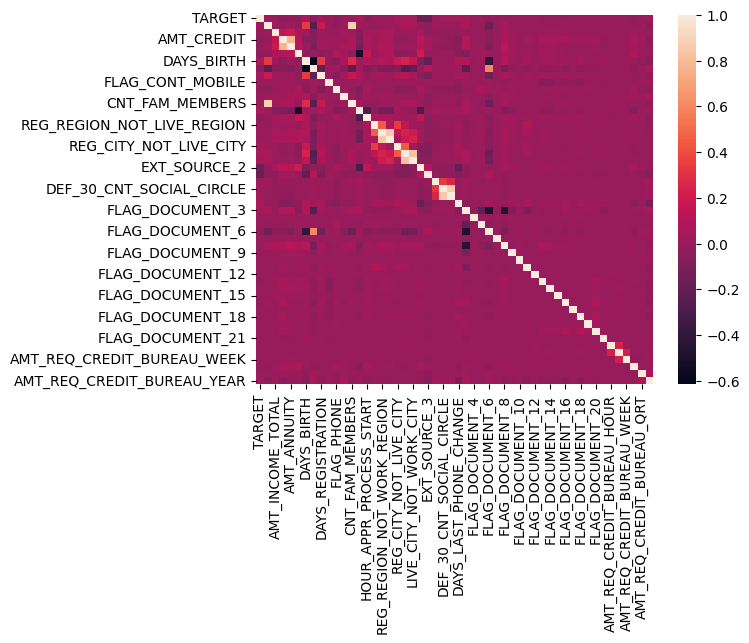

In [41]:
corr = new_df.corr()
sns.heatmap(corr, annot=False )
plt.show()

## DATA SPLIT ✈

In [42]:
#imputing numerical data 
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [43]:
new_df[['AMT_INCOME_TOTAL','DAYS_LAST_PHONE_CHANGE',
    'CNT_FAM_MEMBERS','AMT_ANNUITY',
    'EXT_SOURCE_2','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',       
    'OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',      
'EXT_SOURCE_3']] = imputer.fit_transform(new_df[['AMT_INCOME_TOTAL','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_ANNUITY','EXT_SOURCE_2',                 
                          
                          'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',       
                       'OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',      
 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',      
'EXT_SOURCE_3']]       )    

In [44]:
# Separate features and target variable
X = new_df.drop('TARGET', axis=1)
y = new_df['TARGET']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

print("Train data = ",X_train.shape, y_train.shape)
print("Test data = ",X_test.shape, y_test.shape)

Train data =  (261379, 63) (261379,)
Test data =  (46126, 63) (46126,)


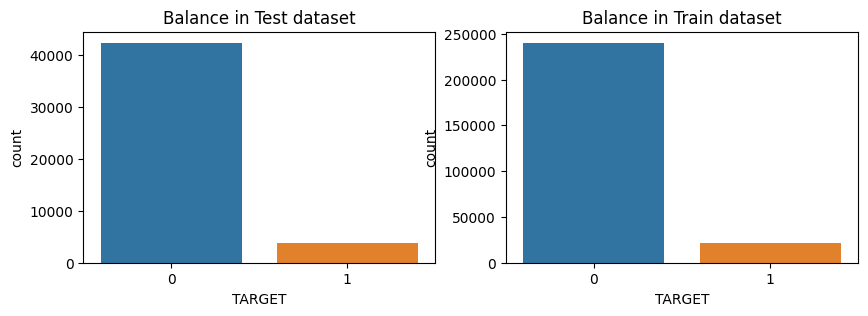

In [48]:
plt.figure(figsize=(10,3))

#plot for test data
plt.subplot(1, 2, 1)
sns.countplot(data=new_df,x=y_test)
plt.title("Balance in Test dataset")

#plot for train data
plt.subplot(1, 2, 2)
sns.countplot(data=new_df, x=y_train)
plt.title("Balance in Train dataset")

#show the plot
plt.show()

In [49]:
#getting those features which are categorical
labels = X_train.describe(include=['object']).columns.values
labels

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'], dtype=object)

In [50]:
#label encoding for categorical features
le = LabelEncoder()
for lab in labels:
    le.fit(X_train[lab].values)
    X_train[lab] = le.transform(X_train[lab])

for lab in labels:
    le.fit(X_test[lab].values)
    X_test[lab] = le.transform(X_test[lab])

In [51]:
#checking for null values
new_df.columns[new_df.isnull().any()]

Index([], dtype='object')

In [52]:
#standardizing the data

sc = StandardScaler()
for col in X_train.columns:
  if col not in labels :
    X_train[col] = sc.fit_transform(X_train[col].values.reshape(-1,1))

for col in X_test.columns:
  if col not in labels :
    X_test[col] = sc.fit_transform(X_test[col].values.reshape(-1,1))

In [53]:
shuffled_data = data.sample(frac=1,random_state=20)
fraud_data = shuffled_data[shuffled_data['TARGET'] == 1]
nonfraud_data = shuffled_data[shuffled_data['TARGET'] == 0].sample(n=24825,random_state=20)
balance_data = pd.concat([fraud_data,nonfraud_data])

In [56]:
#sampling the train data
smt = SMOTE(random_state= 42, n_jobs=-1)
balanced_x, balanced_y = smt.fit_resample(X_train,y_train)


Text(0.5, 1.0, 'Balance in Train dataset after SMOTE')

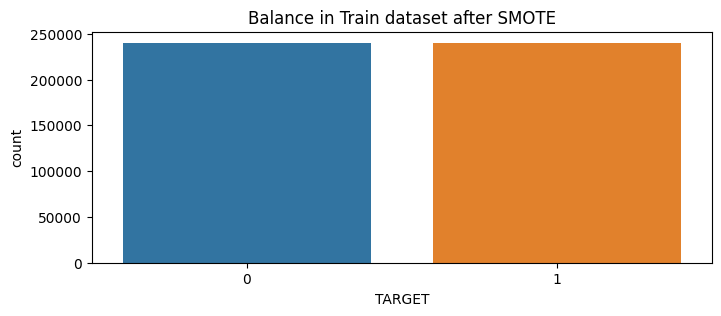

In [57]:
plt.figure(figsize=(8,3))
sns.countplot(data=new_df, x=balanced_y)
plt.title("Balance in Train dataset after SMOTE")

APPLYING MODEL:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                4096      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 32)               

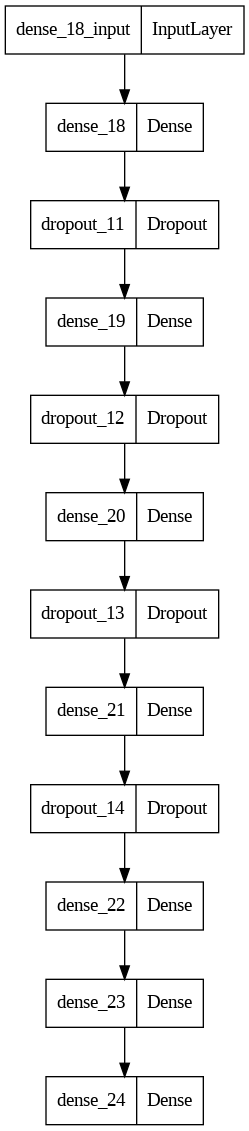

In [69]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

tf.keras.utils.plot_model(model)

### SENSITIVITY / RECALL :
Recall, also known as Sensitivity or True Positive Rate (TPR), is a performance metric used in binary classification tasks.
- It measures the ability of a model to correctly identify positive instances from the total number of actual positive instances.

> Mathematically, Recall is calculated as:

> Recall = TP / (TP + FN)

Where:

- TP (True Positives) is the number of correctly predicted positive instances.
- FN (False Negatives) is the number of actual positive instances incorrectly predicted as negative.

> Recall represents the fraction of relevant instances (positives) that are correctly classified as positive. It indicates the model's ability to minimize false negatives, meaning the instances that are truly positive but predicted as negative.

> Recall is important in situations where correctly identifying positive instances is crucial and missing any positive instances (false negatives) is undesirable. For example, in medical diagnosis, it is important to have high recall to avoid missing any potential cases of a disease, even if it means sacrificing precision (accuracy of positive predictions).








In [77]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall()])


model.fit(balanced_x,balanced_y,
          batch_size=10,
          epochs=5,
          validation_data=(X_test,y_test))


Epoch 1/5
48056/48056 [==============================] - 145s 3ms/step - loss: 0.5397 - accuracy: 0.7351 - recall_5: 0.7672 - val_loss: 0.5661 - val_accuracy: 0.6271 - val_recall_5: 0.6590
Epoch 2/5
48056/48056 [==============================] - 128s 3ms/step - loss: 0.5374 - accuracy: 0.7356 - recall_5: 0.7576 - val_loss: 0.5703 - val_accuracy: 0.6906 - val_recall_5: 0.5789
Epoch 3/5
48056/48056 [==============================] - 125s 3ms/step - loss: 0.5356 - accuracy: 0.7369 - recall_5: 0.7496 - val_loss: 0.5592 - val_accuracy: 0.6885 - val_recall_5: 0.5851
Epoch 4/5
48056/48056 [==============================] - 134s 3ms/step - loss: 0.5349 - accuracy: 0.7380 - recall_5: 0.7546 - val_loss: 0.5454 - val_accuracy: 0.6890 - val_recall_5: 0.5698
Epoch 5/5
48056/48056 [==============================] - 128s 3ms/step - loss: 0.5342 - accuracy: 0.7385 - recall_5: 0.7638 - val_loss: 0.5322 - val_accuracy: 0.7078 - val_recall_5: 0.5384


In [72]:
score = model.evaluate(X_test,y_test)

1442/1442 [==============================] - 2s 2ms/step - loss: 0.5918 - accuracy: 0.6260 - recall_4: 0.6598


In [73]:
y_pred = (model.predict(X_test)>=0.5)*1.0

print("ROC SCORE = ",roc_auc_score(y_test, y_pred))

1442/1442 [==============================] - 2s 1ms/step
ROC SCORE =  0.6413819588592253


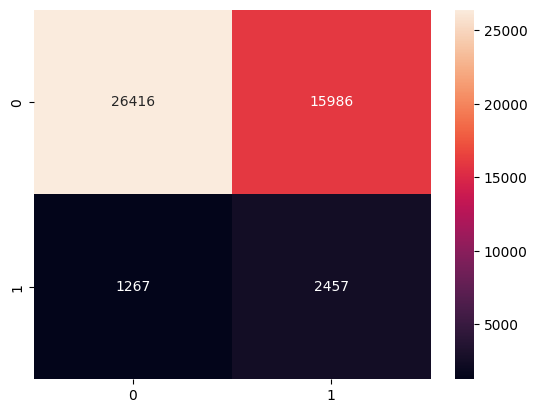

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g'); 

In [75]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.62      0.75     42402
           1       0.13      0.66      0.22      3724

    accuracy                           0.63     46126
   macro avg       0.54      0.64      0.49     46126
weighted avg       0.89      0.63      0.71     46126



1442/1442 [==============================] - 3s 2ms/step


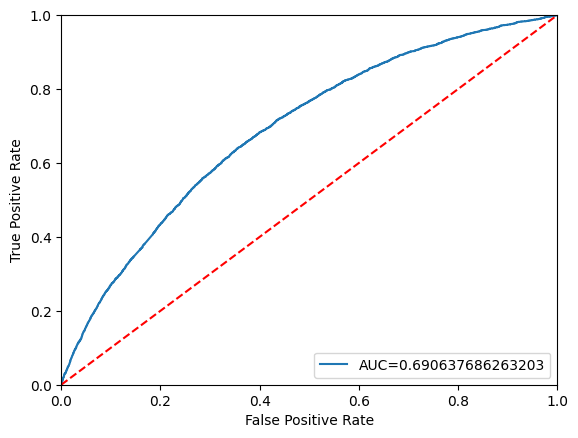

In [76]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
